In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Import expression dataset.
source: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [2]:
dataset = pd.read_csv("data/fer2013.csv")

In [3]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
dataset.shape

(35887, 3)

# Pre-processing data
Preparing data for modeling

In [4]:
# Mapping emotion integer to categorical value
emotions_dict = {0: 'Angry',
                 1: 'Disgust',
                 2: 'Fear',
                 3: 'Happy',
                 4: 'Sad',
                 5: 'Surprise',
                 6: 'Neutral'}

# dataset['expression'] = list(map(lambda x:emotions_dict[x], dataset['emotion']))
# dataset.head()

#### Understanding Usage Column:
The given dataset is already tagged distinct sets:

In [5]:
dataset.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [6]:
print(sum(dataset['Usage'] == 'Training'))
print(sum(dataset['Usage'] == 'PublicTest'))
print(sum(dataset['Usage'] == 'PrivateTest'))

28709
3589
3589


Therefore, we can see that 80% of the dataset is tagged as 'Training' and 10% as PublicTest and PrivateTest each respectively. <br>
Next, using these tags form Training, Validation and Test data sets.


### Understanding and normalizing pixels column   

In [7]:
print(dataset['pixels'][1])
len(dataset['pixels'][1])

151 150 147 155 148 133 111 140 170 174 182 154 153 164 173 178 185 185 189 187 186 193 194 185 183 186 180 173 166 161 147 133 172 151 114 161 161 146 131 104 95 132 163 123 119 129 140 120 151 149 149 153 137 115 129 166 170 181 164 143 157 156 169 179 185 183 186 186 184 190 191 184 186 190 183 175 168 160 147 136 135 167 136 108 153 167 149 137 111 90 134 162 121 122 141 137 151 151 156 143 116 124 159 164 174 169 135 144 155 153 164 170 176 178 177 178 187 185 181 182 183 181 178 170 164 158 148 144 130 136 173 130 97 137 167 157 138 113 90 138 168 109 123 146 151 152 155 127 113 159 167 170 171 142 131 140 154 162 168 169 169 164 168 173 176 179 178 176 173 172 170 161 154 152 146 145 137 124 130 171 124 102 133 164 152 138 110 86 154 149 100 139 153 151 136 113 142 159 161 174 150 127 136 140 154 164 163 167 173 172 171 170 167 168 172 167 162 161 160 163 163 154 145 146 140 133 122 135 167 127 101 126 164 147 132 95 91 166 115 113 158 143 121 134 153 153 164 162 131 130 136 146

8687

In [8]:
type(dataset.pixels[0])

str

### Convert space seperated string into a 48 x 48 integer array for every record

In [9]:
#Checking on one record
image = np.fromstring(dataset.pixels[0], dtype=int, sep=' ')
image = np.reshape(image, (48, 48))

In [10]:
image

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]])

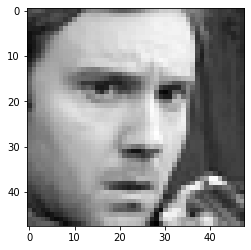

In [11]:
plt.imshow(image, interpolation = 'none', cmap='gray')

#### Creating Integer array of pixels for each record:

In [12]:
def get_matrix_and_labels(data):
    """
        Prepare pixel matrix for each image.
        and return list of labels along with pixels.
    """
    image_mat_list = np.zeros(shape=(len(data), 48, 48))
    label_list = np.array(list(map(int,data['emotion'])))
    
    for i,pixels in enumerate(data['pixels']):
        image = np.fromstring(pixels, dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        
        image_mat_list[i] = image
    
    return image_mat_list, label_list



#### Dividing into train, test and validation sets

In [13]:
train_set, train_labels = get_matrix_and_labels(dataset[dataset['Usage'] == 'Training'])
val_set, val_labels = get_matrix_and_labels(dataset[dataset['Usage'] == 'PrivateTest'])
test_set, test_labels = get_matrix_and_labels(dataset[dataset['Usage'] == 'PublicTest'])

In [14]:
def plot_every_emotion():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    
    axs = axs.ravel()
    
    for i in range(7):
        idx = dataset[dataset['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions_dict[i])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

#### Normalize the image data for learning

In [15]:
# Scale the same distribution to 0<= x <= 1
train_images = train_set.reshape((train_set.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_set.reshape((val_set.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_set.reshape((test_set.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

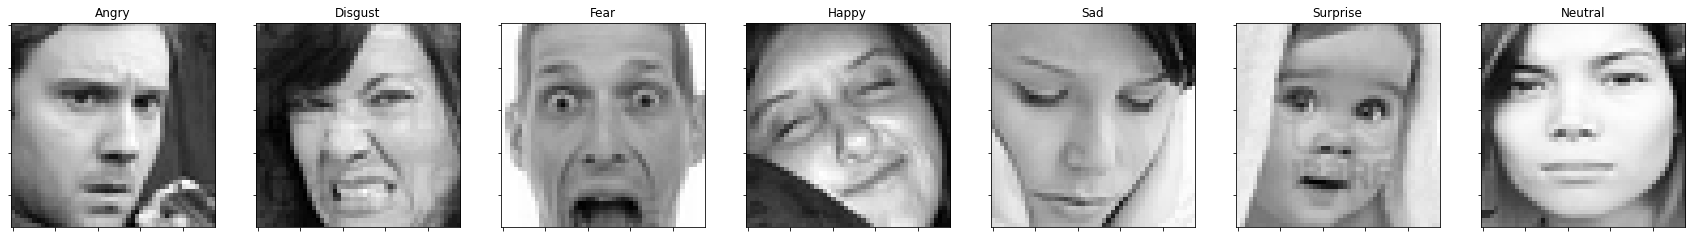

In [16]:
plot_every_emotion()

## Visualizing processed data

In [17]:
labels = list(emotions_dict.values())
train_emotions =  []

for i in range(7):
    train_emotions.append(sum(train_labels==i))

val_emotions = []
for i in range(7):
    val_emotions.append(sum(val_labels==i))


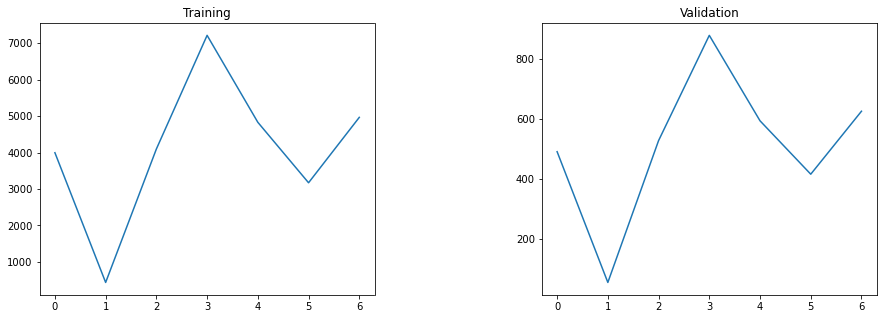

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax1.set_title("Training")
ax1.plot(train_emotions)
ax2.set_title("Validation")
ax2.plot(val_emotions)

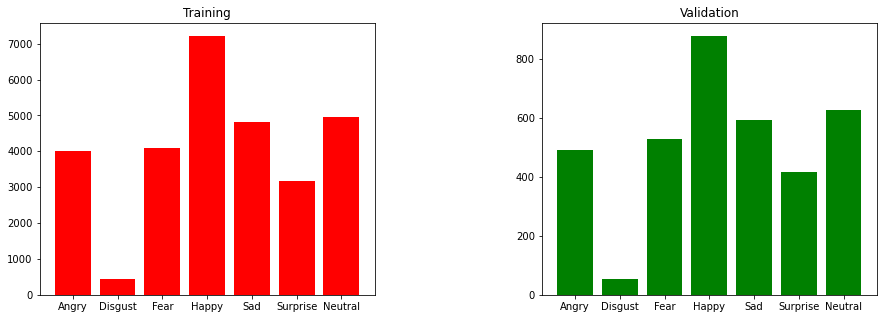

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax1.set_title("Training")
ax1.bar(labels, train_emotions, color ='red')
ax2.set_title("Validation")
ax2.bar(labels, val_emotions, color = 'green')
plt.show()

### Obsevations:
The samples available for disgust emotion seems insufficient for the model to learn it accurately. 
It might also cause misclassification for other samples if trained. Therefore, it makes sense to drop samples with "Disgust" as labels from all 3 datasets.

In [20]:
train_images = train_images[train_labels!=1]
train_labels = np.array([x for x in train_labels if x!=1])

In [21]:
val_images = val_images[val_labels!=1]
val_labels = np.array([x for x in val_labels if x!=1])

In [22]:
test_images = test_images[test_labels!=1]
test_labels = np.array([x for x in test_labels if x!=1])

In [23]:
labels = list(emotions_dict.values())
train_emotions =  []

for i in range(7):
    train_emotions.append(sum(train_labels==i))

val_emotions = []
for i in range(7):
    val_emotions.append(sum(val_labels==i))

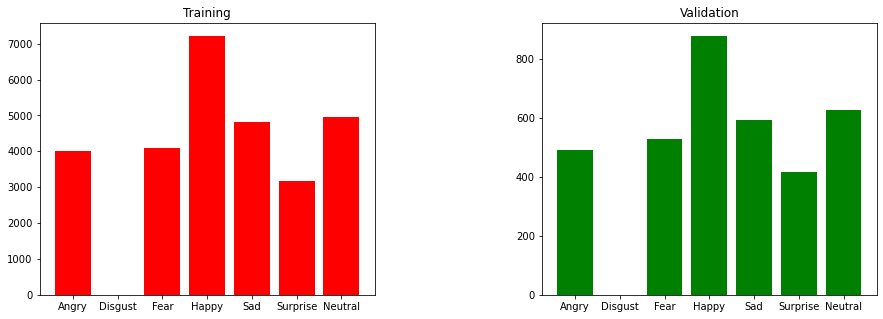

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax1.set_title("Training")
ax1.bar(labels, train_emotions, color ='red')
ax2.set_title("Validation")
ax2.bar(labels, val_emotions, color = 'green')
plt.show()

In [25]:
# Save normalized data in a csv at this point
# pd.DataFrame(array_name).to_csv("file/path.csv")

# Building a model

In [26]:
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical

In [27]:
train_labels = to_categorical(train_labels)

In [28]:
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

### Addressing class imbalance:
Further from the plots above we can see there is a considerable difference between the majority class ("Happy") and rest of the class. Introducing class weights to the model will address this imbalance.

In [56]:
def get_class_weights():
    samples = dataset[dataset["Usage"] == "Training"]
    filtered_samples = samples[dataset["emotion"] !=1]
    count = len(filtered_samples)
    ratio_list = [samples["emotion"].value_counts().sort_index()/count]
#     print(ratio_list[0].tolist)
    ratio_list = ratio_list[0].tolist()
#     print(ratio_list)
    return dict(zip(range(0,7), ratio_list))

In [57]:
class_weights = get_class_weights()
class_weights

<ipython-input-56-51d796c39427>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_samples = samples[dataset["emotion"] !=1]


{0: 0.14130088777278677,
 1: 0.01542107310861953,
 2: 0.1449085700137941,
 3: 0.25519046440066495,
 4: 0.17083436494181728,
 5: 0.11215647437484526,
 6: 0.17560923849609167}

#### Note:
The value for emotion 1 ("Disgust") is incorrect but insignificant as the samples with label 1 are removed from the training set. All other class weights are accurate. 

In [46]:
#Removing weight of "Disgust" tag
del class_weights[1]
class_weights

{0: 0.14130088777278677,
 2: 0.1449085700137941,
 3: 0.25519046440066495,
 4: 0.17083436494181728,
 5: 0.11215647437484526,
 6: 0.17560923849609167}

In [47]:
#Calculate class weights for distribution
# print(len(train_images))
# class_weight = dict(zip(range(0, 7), (((dataset[dataset['Usage']=='Training']['emotion'].value_counts()).
#                                        sort_index())/len(train_images).tolist())))
                                      
# #                                       len(dataset[dataset['Usage']=='Training']['emotion'])).tolist()))

In [48]:
# class_weight

In [49]:
# Reshape the inputs for Sequential model
# train_images = train_images.reshape((train_set.shape[0], 48, 48, 1))
# val_images = val_images.reshape((val_set.shape[0], 48, 48, 1))
# test_images = test_images.reshape((test_set.shape[0], 48, 48, 1))

In [94]:
train_images.shape

(28709, 48, 48, 1)

In [50]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [51]:
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [59]:
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weights,
                    epochs=50,
                    batch_size=64)

Epoch 1/50
442/442 [==============================] - 41s 94ms/step - loss: 0.1111 - accuracy: 0.7453 - val_loss: 1.3432 - val_accuracy: 0.5467
Epoch 2/50
442/442 [==============================] - 45s 102ms/step - loss: 0.1027 - accuracy: 0.7621 - val_loss: 1.4111 - val_accuracy: 0.5523
Epoch 3/50
442/442 [==============================] - 43s 98ms/step - loss: 0.0937 - accuracy: 0.7842 - val_loss: 1.4756 - val_accuracy: 0.5407
Epoch 4/50
442/442 [==============================] - 50s 113ms/step - loss: 0.0862 - accuracy: 0.8042 - val_loss: 1.6235 - val_accuracy: 0.5291
Epoch 5/50
442/442 [==============================] - 51s 115ms/step - loss: 0.0787 - accuracy: 0.8186 - val_loss: 1.6259 - val_accuracy: 0.5436
Epoch 6/50
442/442 [==============================] - 48s 109ms/step - loss: 0.0712 - accuracy: 0.8363 - val_loss: 1.7400 - val_accuracy: 0.5390
Epoch 7/50
442/442 [==============================] - 47s 107ms/step - loss: 0.0659 - accuracy: 0.8513 - val_loss: 1.8729 - val_accu

# 2. Using Data Augmentation

In [ ]:
#Using the same model layers

model2 = models.Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(7, activation='softmax'))

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

In [61]:
# training_generator = datagen.flow(x_train, y_train, batch_size=64,subset='training',seed=7)
# validation_generator = datagen.flow(x_train, y_train, batch_size=64,subset='validation',seed=7)

In [62]:
#Visualize training generator

In [63]:
#Train model